# Index-1 Normal Form Saddle (3DoF)

In [1]:
from ldds.base import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds

from ldds.vector_fields import quadratic_normalform_saddlecentercenter
from ldds.hamiltonians import quadratic_normal_form_saddlecentercenter_ham

Total Energy

\begin{equation*}
H(x, y, z, p_x, p_y, p_z) = T(p_x, p_y, p_z) + V(x,y,z) = \frac{1}{2} \bigl(p_x^2 + p_y^2 + p_z^2\bigr) + \frac{1}{2}\bigl(y^2 + z^2 - x^2\bigr).
\end{equation*}

Vector field

\begin{align*}
\dot{x} &= p_x, \\
\dot{y} &= p_y, \\
\dot{z} &= p_z, \\
\dot{p}_x &= x, \\
\dot{p}_y &= -y, \\
\dot{p}_z &= -z.
\end{align*}

In [2]:
# Integration parameters
tau = 10

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = 1 # Energy
ax1_min,ax1_max = [-2, 2]
ax2_min,ax2_max = [-2, 2]
N1, N2 = [100, 100]

# Box escape condition
box_boundaries = False

# Grid parameters
dims_fixed = [0,1,1,0,1,0] # Variable ordering (x, y, z, p_x p_y p_z)
dims_fixed_values = [0,1,0.9] # This can also be an array of values
dims_slice = [1,0,0,1,0,0] # Visualisation slice
momentum_sign = -1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [3]:
Hamiltonian = quadratic_normal_form_saddlecentercenter_ham
vector_field = quadratic_normalform_saddlecentercenter

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : dims_fixed,
        'dims_fixed_values' : dims_fixed_values,
        'momentum_sign' : momentum_sign,
        'Hamiltonian': Hamiltonian,
        'energy_level': H0
    }

In [4]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

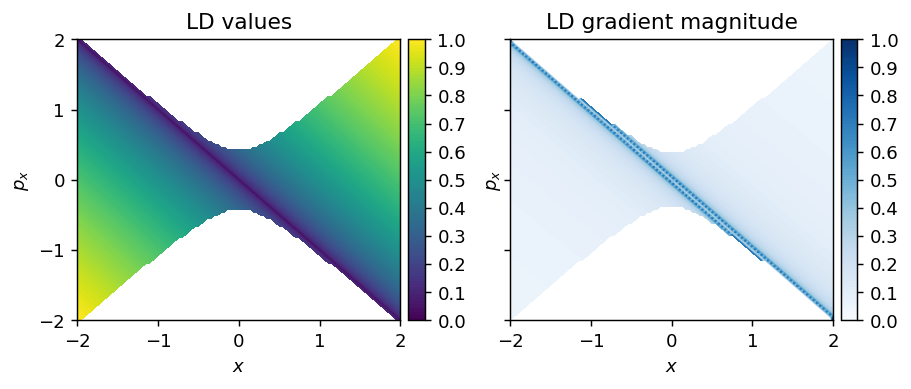

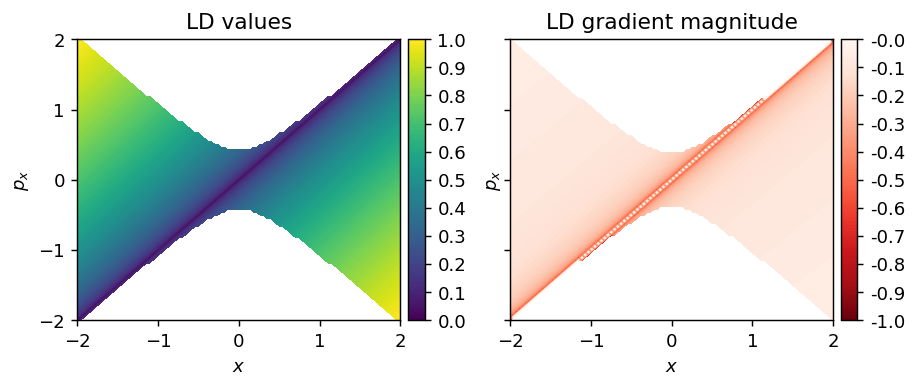

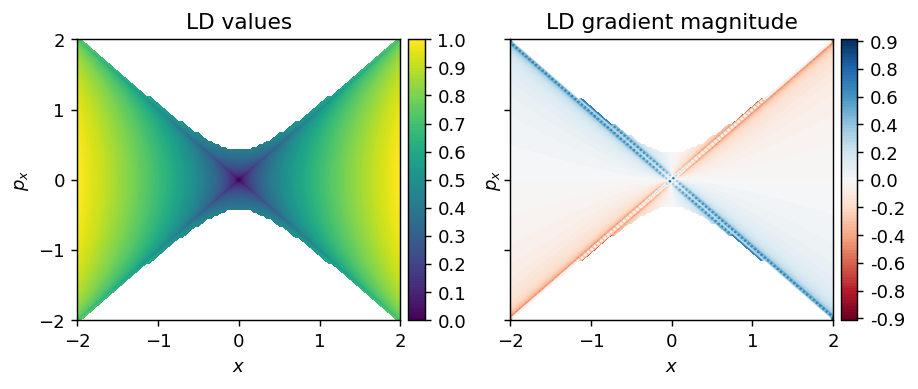

In [5]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters)